# Lecture et analyse des données


<img src="./img/logo.png" alt="logo">


## Sommaire

- Analyse global des fichiers / dossiers
- Analyse générale des valeurs
- Analyse avancé

### Analyse global des fichiers / dossiers

In [4]:
# !pip install seaborn

In [5]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import pickle
import numpy as np
import seaborn as sns

style_plot = "seaborn-darkgrid"
plt.style.use(style_plot)

In [6]:
data_path = "./data/"
all_clicks = "./data/clicks/"

In [7]:
print("./data")
for f in os.listdir(data_path):
    print("|_",f)

./data
|_ articles_embeddings.pickle
|_ articles_metadata.csv
|_ clicks
|_ clicks_sample.csv


In [8]:
all_clicks_file = os.listdir(all_clicks)
df_clicks_0 = pd.read_csv(all_clicks + all_clicks_file[0])
print("le dossier clicks/ contient",len(all_clicks_file), "fichiers")
print("Voici un exemple du contenue du premier fichier (",all_clicks_file[0],")")
print("Dimensionnalité :",df_clicks_0.shape)
df_clicks_0.head()

le dossier clicks/ contient 385 fichiers
Voici un exemple du contenue du premier fichier ( clicks_hour_000.csv )
Dimensionnalité : (1883, 12)


,user_id,session_id,session_start,session_size,click_article_id,click_timestamp,click_environment,click_deviceGroup,click_os,click_country,click_region,click_referrer_type
0,0,1506825423271737,1506825423000,2,157541,1506826828020,4,3,20,1,20,2
1,0,1506825423271737,1506825423000,2,68866,1506826858020,4,3,20,1,20,2
2,1,1506825426267738,1506825426000,2,235840,1506827017951,4,1,17,1,16,2
3,1,1506825426267738,1506825426000,2,96663,1506827047951,4,1,17,1,16,2
4,2,1506825435299739,1506825435000,2,119592,1506827090575,4,1,17,1,24,2


In [9]:
df_clicks_1 = pd.read_csv(all_clicks + all_clicks_file[1])
print("Dimensionnalité :",df_clicks_1.shape)
df_clicks_1.head()

Dimensionnalité : (1415, 12)


,user_id,session_id,session_start,session_size,click_article_id,click_timestamp,click_environment,click_deviceGroup,click_os,click_country,click_region,click_referrer_type
0,707,1506828988347444,1506828988000,3,119592,1506828988615,4,3,2,1,21,5
1,707,1506828988347444,1506828988000,3,202436,1506829330533,4,3,2,1,21,1
2,707,1506828988347444,1506828988000,3,237620,1506829360533,4,3,2,1,21,1
3,708,1506828991788445,1506828991000,2,68866,1506829050054,2,4,2,1,8,2
4,708,1506828991788445,1506828991000,2,96663,1506829080054,2,4,2,1,8,2


In [10]:
df_meta= pd.read_csv(data_path + "articles_metadata.csv")
print("Dimensionnalité :",df_meta.shape)
df_meta.head()

Dimensionnalité : (364047, 5)


,article_id,category_id,created_at_ts,publisher_id,words_count
0,0,0,1513144419000,0,168
1,1,1,1405341936000,0,189
2,2,1,1408667706000,0,250
3,3,1,1408468313000,0,230
4,4,1,1407071171000,0,162


In [11]:
df_meta["created_at_ts"] = pd.to_datetime(df_meta["created_at_ts"],unit="ms")
df_meta.head()

,article_id,category_id,created_at_ts,publisher_id,words_count
0,0,0,2017-12-13 05:53:39,0,168
1,1,1,2014-07-14 12:45:36,0,189
2,2,1,2014-08-22 00:35:06,0,250
3,3,1,2014-08-19 17:11:53,0,230
4,4,1,2014-08-03 13:06:11,0,162


In [12]:
df_sample=pd.read_csv(data_path + "clicks_sample.csv")
print("Dimensionnalité :",df_sample.shape)
df_sample.head()

Dimensionnalité : (1883, 12)


,user_id,session_id,session_start,session_size,click_article_id,click_timestamp,click_environment,click_deviceGroup,click_os,click_country,click_region,click_referrer_type
0,0,1506825423271737,1506825423000,2,157541,1506826828020,4,3,20,1,20,2
1,0,1506825423271737,1506825423000,2,68866,1506826858020,4,3,20,1,20,2
2,1,1506825426267738,1506825426000,2,235840,1506827017951,4,1,17,1,16,2
3,1,1506825426267738,1506825426000,2,96663,1506827047951,4,1,17,1,16,2
4,2,1506825435299739,1506825435000,2,119592,1506827090575,4,1,17,1,24,2


In [13]:
df_sample["session_start"] = pd.to_datetime(df_sample["session_start"], unit="ms")
df_sample["click_timestamp"] = pd.to_datetime(df_sample["click_timestamp"], unit="ms")

In [14]:
open_click_pickle = open("./data/articles_embeddings.pickle","rb")
numpy_arr = pickle.load(open_click_pickle)
open_click_pickle.close()

In [15]:
print("Le type de l\'objet est :",type(numpy_arr))
print("Sa dimensionalité est de :",numpy_arr.shape)

Le type de l'objet est : <class 'numpy.ndarray'>
Sa dimensionalité est de : (364047, 250)


#### Résumé des différent fichier du jeu de données fournie :

<a href="https://www.kaggle.com/gspmoreira/news-portal-user-interactions-by-globocom">Données sources accessible ici.</a>

- **articles_embeddings.pickle :** <br>
Ce fichier contient un plongement d'artricle d'une dimensionnalité de 250 basé sur 364047 article, le fichier original n'a pas pue être fournie par des problème de license mais ce plongement de données sauvegarder au format pickle est accesible.
<br><br>
- **articles_metadata.csv :**<br>
Ce fichier contient les différentes méta données de tous les articles publiés
<br><br>
- **/clicks/ :**<br>
Dossier avec des fichiers CSV (un par heure), contenant les interactions des sessions d'utilisateurs dans le portail de nouvelles.
<br><br>
- **clicks_sample.csv :**<br>
échantillion de fichier csv des interaction des sessions utilisateur dans le portail.

### Analyse générale des valeurs

#### all click files

In [16]:
def get_all_files_clicks(path : str) -> pd.DataFrame:
    all_df = pd.DataFrame()
    for f in os.listdir(path):
        df = pd.read_csv(path + f)
        all_df = all_df.append(df)
    return all_df

def describe_data(data : pd.DataFrame) -> pd.DataFrame:
    # Toutes les valeurs uniques
    data_unique = pd.DataFrame(data.apply(lambda col : col.unique()),columns=["unique_value"])
    # Le nombre de valeurs uniques
    data_unique["unique_count"] = data.apply(lambda col : col.nunique())
    # Le nombre de valeurs non vides
    data_unique["row_not_na"]=data.notna().astype(int).agg("sum")
    # Le pourcentage de valeurs uniques
    data_unique["unique_rate"]=((data_unique.unique_count / data_unique.row_not_na) * 100).round(4)

    return data_unique.sort_values(by='unique_rate',ascending=False)

In [17]:
%%time
all_df = get_all_files_clicks(all_clicks)
print("Voici la dimension total de l'ensemble des fichiers \"click\" regroupé :",all_df.shape)

Voici la dimension total de l'ensemble des fichiers "click" regroupé : (2988181, 12)
CPU times: user 40.1 s, sys: 38.3 s, total: 1min 18s
Wall time: 1min 20s


In [18]:
all_df.head()

,user_id,session_id,session_start,session_size,click_article_id,click_timestamp,click_environment,click_deviceGroup,click_os,click_country,click_region,click_referrer_type
0,0,1506825423271737,1506825423000,2,157541,1506826828020,4,3,20,1,20,2
1,0,1506825423271737,1506825423000,2,68866,1506826858020,4,3,20,1,20,2
2,1,1506825426267738,1506825426000,2,235840,1506827017951,4,1,17,1,16,2
3,1,1506825426267738,1506825426000,2,96663,1506827047951,4,1,17,1,16,2
4,2,1506825435299739,1506825435000,2,119592,1506827090575,4,1,17,1,24,2


In [19]:
print("Information du DataFrame :")
all_df.info(null_counts=True)

Information du DataFrame :
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2988181 entries, 0 to 2568
Data columns (total 12 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   user_id              2988181 non-null  object
 1   session_id           2988181 non-null  object
 2   session_start        2988181 non-null  object
 3   session_size         2988181 non-null  object
 4   click_article_id     2988181 non-null  object
 5   click_timestamp      2988181 non-null  object
 6   click_environment    2988181 non-null  object
 7   click_deviceGroup    2988181 non-null  object
 8   click_os             2988181 non-null  object
 9   click_country        2988181 non-null  object
 10  click_region         2988181 non-null  object
 11  click_referrer_type  2988181 non-null  object
dtypes: object(12)
memory usage: 296.4+ MB


In [20]:
all_df["session_start"] = pd.to_datetime(all_df["session_start"], unit="ms")
all_df["click_timestamp"] = pd.to_datetime(all_df["click_timestamp"], unit="ms")

In [21]:
print("nombre de users :",all_df["user_id"].unique().shape[0])

nombre de users : 322897


In [22]:
describe_data(all_df)

,unique_value,unique_count,row_not_na,unique_rate
click_timestamp,"[2017-10-01T03:00:28.020000000, 2017-10-01T03:...",2983198,2988181,99.8332
session_id,"[1506825423271737, 1506825426267738, 150682543...",1048594,2988181,35.0914
session_start,"[2017-10-01T02:37:03.000000000, 2017-10-01T02:...",646874,2988181,21.6478
user_id,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",322897,2988181,10.8058
click_article_id,"[157541, 68866, 235840, 96663, 119592, 30970, ...",46033,2988181,1.5405
session_size,"[2, 3, 7, 6, 4, 5, 16, 8, 10, 9, 24, 11, 13, 2...",72,2988181,0.0024
click_region,"[20, 16, 24, 21, 17, 25, 12, 18, 19, 6, 9, 13,...",28,2988181,0.0009
click_country,"[1, 11, 10, 8, 2, 4, 7, 3, 9, 5, 6]",11,2988181,0.0004
click_os,"[20, 17, 2, 12, 13, 19, 5, 3]",8,2988181,0.0003
click_deviceGroup,"[3, 1, 4, 5, 2]",5,2988181,0.0002


In [23]:
print("nombre de lignes totalement dupliquées :",all_df[all_df.duplicated()].shape[0])

nombre de lignes totalement dupliquées : 0


Explication des colonnes :
- **click_timestamp** : date/heure du click sur l'article par l'utilisateur.
- **user_id** : identifiant unique d'utilisateur
- **session_id** : identifiant unique de session utilisateur. peut apparaître plusieur fois car plusieurs clic par session
- **session_start** : date (horodatage) de début de la session.
- **session_size** : Nombre de clic par session.
- **click_article_id** : article qui à était cliqué
- **click_environment** : 3 valeurs surment associée à [...]
- **click_deviceGroup** : 5 valeurs associée au type d'appareil utilisé (ordianeteur fixe/portable, tablette, smartphone...) 
- **click_os** : système d'exploitation de l'appareil (Android, Windows, MacOS,Linux..) 
- **click_country** : Le pays de provenance de l'utilisateur
- **click_region** : La région de l'utilisateur
- **click_referrer_type** : [...]

#### articles_metadata.csv

In [24]:
df_meta.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364047 entries, 0 to 364046
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   article_id     364047 non-null  int64         
 1   category_id    364047 non-null  int64         
 2   created_at_ts  364047 non-null  datetime64[ns]
 3   publisher_id   364047 non-null  int64         
 4   words_count    364047 non-null  int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 13.9 MB


In [25]:
describe_data(df_meta)

,unique_value,unique_count,row_not_na,unique_rate
article_id,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",364047,364047,100.0000
created_at_ts,"[2017-12-13T05:53:39.000000000, 2014-07-14T12:...",359552,364047,98.7653
words_count,"[168, 189, 250, 230, 162, 196, 203, 154, 209, ...",866,364047,0.2379
category_id,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",461,364047,0.1266
publisher_id,[0],1,364047,0.0003


In [26]:
df_meta.describe().T

,count,mean,std,min,25%,50%,75%,max
article_id,364047.0,182023.000000,105091.461061,0.0,91011.5,182023.0,273034.5,364046.0
category_id,364047.0,283.108239,136.723470,0.0,199.0,301.0,399.0,460.0
publisher_id,364047.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
words_count,364047.0,190.897727,59.502766,0.0,159.0,186.0,218.0,6690.0


In [27]:
print("nombre de lignes totalement dupliquées :",df_meta[df_meta.duplicated()].shape[0])

nombre de lignes totalement dupliquées : 0


[Faire une description des résultats obtenue...]

Explication des colonnes :
- **article_id** : identifiant unique pour l'article
- **category_id** : la catégorie de l'article, il y a 461 catégories en tout.
- **created_at_ts** : date de création de l'article.
- **publisher_id** : cette colonnes semblent vide (toutes les valeurs à 0)
- **words_count** : nombre de mots dans l'article. De 0 (semble être un bug ?) à 6690.

### Affichage en 2 Dimension du plongement de mots (articles_embeddings.pickle)

In [30]:
%%time
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, 
                     n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(numpy_arr[:50000])

df_tsne = pd.DataFrame(X_tsne, columns=['tsne1', 'tsne2'])
print(df_tsne.shape)

(50000, 2)
CPU times: user 1h 6min 48s, sys: 23min 28s, total: 1h 30min 17s
Wall time: 3min 7s


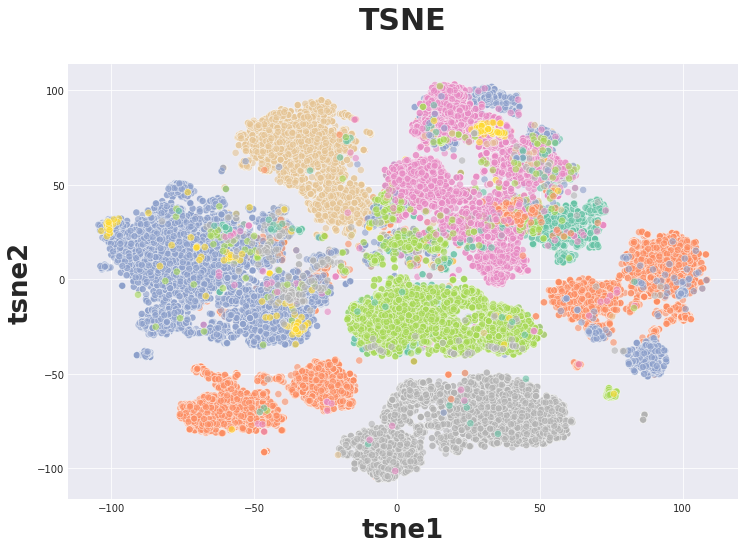

In [31]:
plt.figure(figsize=(12,8))

df_tsne["category_id"] = df_meta["category_id"].head(50000)

sns.scatterplot(
    x="tsne1", y="tsne2",hue="category_id",
    palette=sns.color_palette('Set2',df_meta["category_id"].head(50000).nunique()),
    data=df_tsne,s=50, alpha=0.6, legend=None)

plt.title('TSNE', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold') 

plt.show()

### Résumé

Voici un schéma qui reprend l'interaction entre les différent structure de données :

<img src="./img/data_structure.png">

## Analyse avancé / temporelle

##### articles_metadata.csv

In [32]:
df_meta.head()

,article_id,category_id,created_at_ts,publisher_id,words_count
0,0,0,2017-12-13 05:53:39,0,168
1,1,1,2014-07-14 12:45:36,0,189
2,2,1,2014-08-22 00:35:06,0,250
3,3,1,2014-08-19 17:11:53,0,230
4,4,1,2014-08-03 13:06:11,0,162


In [33]:
print("La date de publication la plus ancienne est :",df_meta["created_at_ts"].min())
print("La date de publication la plus récentes est :",df_meta["created_at_ts"].max())

La date de publication la plus ancienne est : 2006-09-27 11:14:35
La date de publication la plus récentes est : 2018-03-13 12:12:30


In [23]:
nb_article = int(df_meta["article_id"].nunique())
nb_category = int(df_meta["category_id"].nunique())
print("Le jeu de données article_metadata.csv contient un total de", nb_article,"article répartie sur",nb_category,"categorie.")

Le jeu de données article_metadata.csv contient un total de 364047 article répartie sur 461 categorie.


In [25]:
temp = df_meta.copy()
temp.index = df_meta["created_at_ts"]

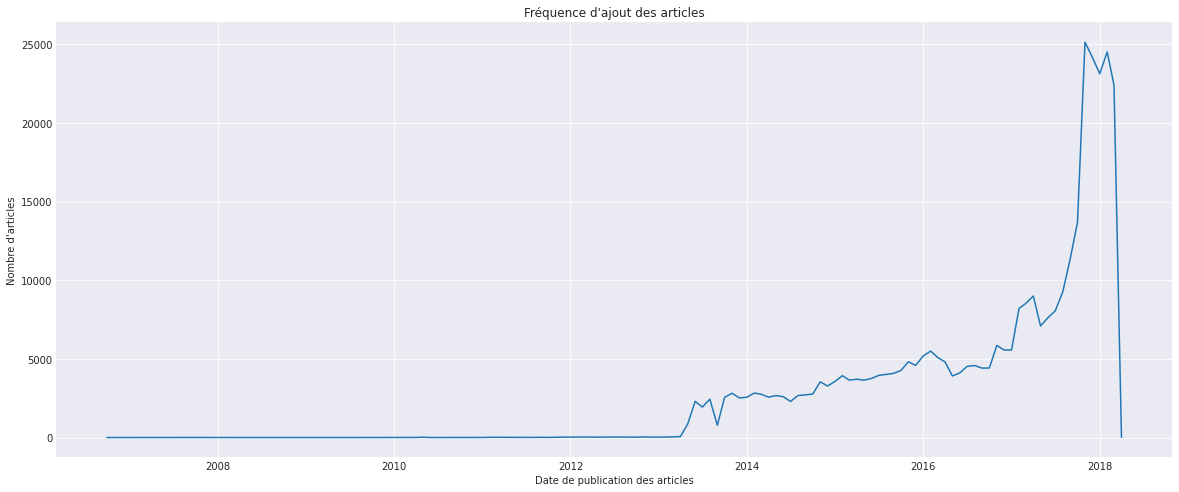

In [26]:
plt.figure(figsize=(20,8))
plt.plot(temp.resample("M")["article_id"].count())
plt.xlabel("Date de publication des articles")
plt.ylabel("Nombre d\'articles")
plt.title("Fréquence d\'ajout des articles")
plt.show()

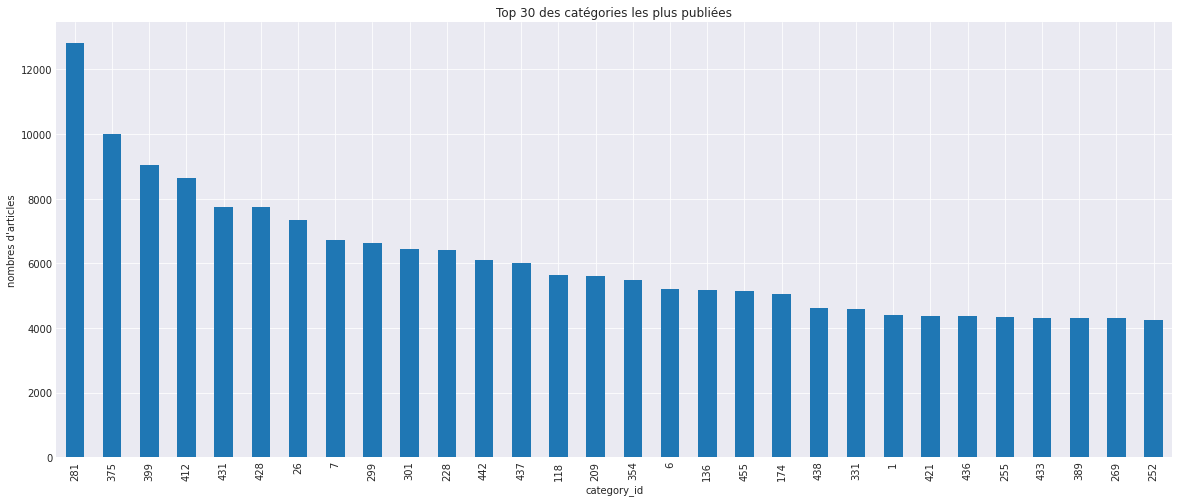

In [27]:
best_30_category = temp.groupby("category_id")["article_id"].count().sort_values(ascending=False).head(30)
plt.figure(figsize=(20,8))
plt.title("Top 30 des catégories les plus publiées")
best_30_category.plot(kind="bar")
plt.xlabel("category_id")
plt.ylabel("nombres d\'articles")
plt.show()

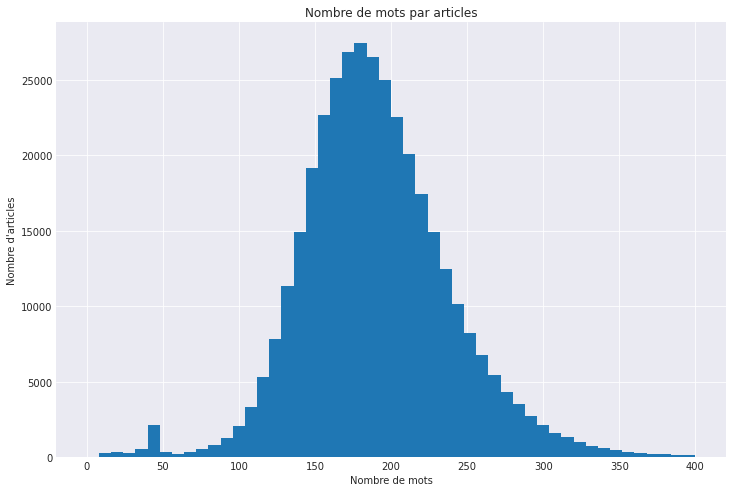

In [28]:
plt.figure(figsize=(12,8))
plt.title("Nombre de mots par articles")
temp.words_count.hist(bins=50,range=(0,400))
plt.xlabel("Nombre de mots")
plt.ylabel("Nombre d\'articles")
plt.show()

### all_clicks 

In [29]:
all_df.head()

,user_id,session_id,session_start,session_size,click_article_id,click_timestamp,click_environment,click_deviceGroup,click_os,click_country,click_region,click_referrer_type
0,0,1506825423271737,2017-10-01 02:37:03,2,157541,2017-10-01 03:00:28.020,4,3,20,1,20,2
1,0,1506825423271737,2017-10-01 02:37:03,2,68866,2017-10-01 03:00:58.020,4,3,20,1,20,2
2,1,1506825426267738,2017-10-01 02:37:06,2,235840,2017-10-01 03:03:37.951,4,1,17,1,16,2
3,1,1506825426267738,2017-10-01 02:37:06,2,96663,2017-10-01 03:04:07.951,4,1,17,1,16,2
4,2,1506825435299739,2017-10-01 02:37:15,2,119592,2017-10-01 03:04:50.575,4,1,17,1,24,2


In [34]:
print("L\'interaction la plus ancienne est :",all_df["click_timestamp"].min())
print("L\'interaction la plus récentes est :",all_df["click_timestamp"].max())

L'interaction la plus ancienne est : 2017-10-01 03:00:00.026000
L'interaction la plus récentes est : 2017-11-13 20:04:14.886000


> **/!\ On remarque ici un problème de temporalité, certainne interaction on était effectué sur des articles créer dans après la date d'interaction!**

On peut supposer que les articles ont été mis à jour et republiés avec le même identifiant

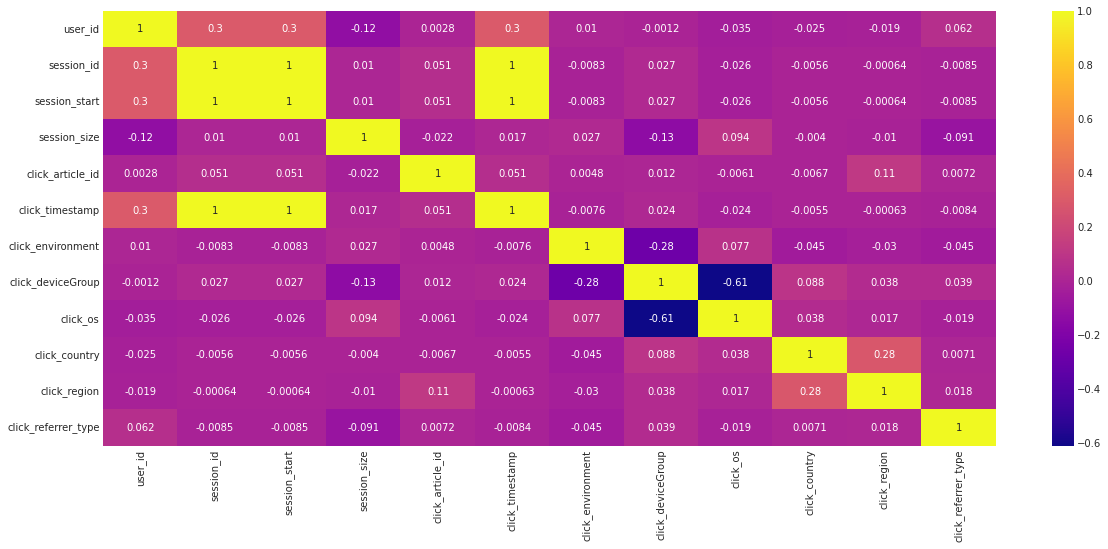

In [30]:
correlation_map = all_df[all_df.columns.tolist()].astype("int64").corr()
plt.figure(figsize=(20,8))
sns.heatmap(correlation_map,annot=True,cmap="plasma")
plt.show()

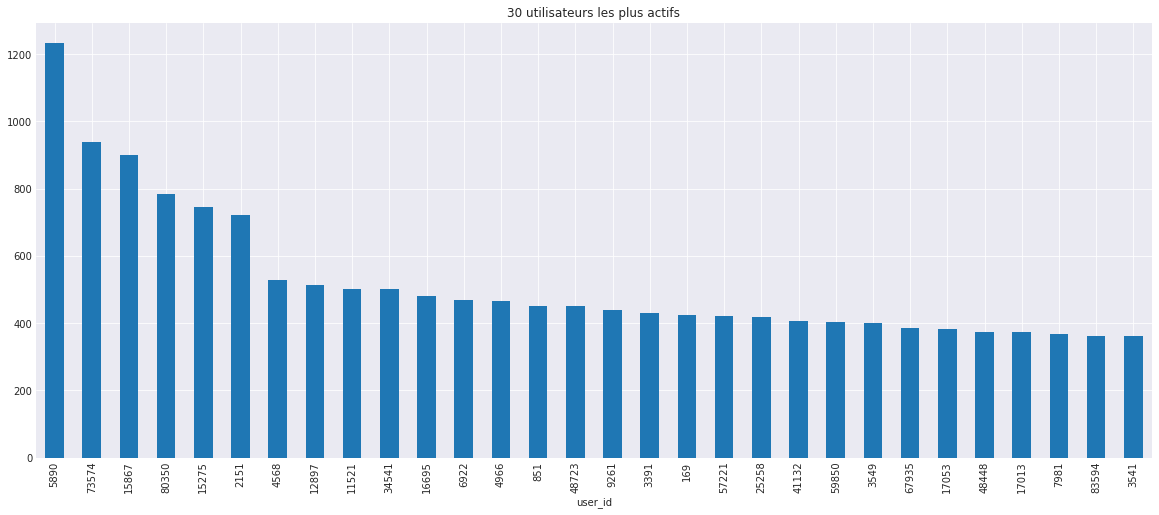

In [36]:
plt.figure(figsize=(20,8))
all_df.groupby("user_id")["click_article_id"].count().sort_values(ascending=False).head(30).plot(kind="bar",
                                                                                                 title="30 utilisateurs les plus actifs")
plt.show()

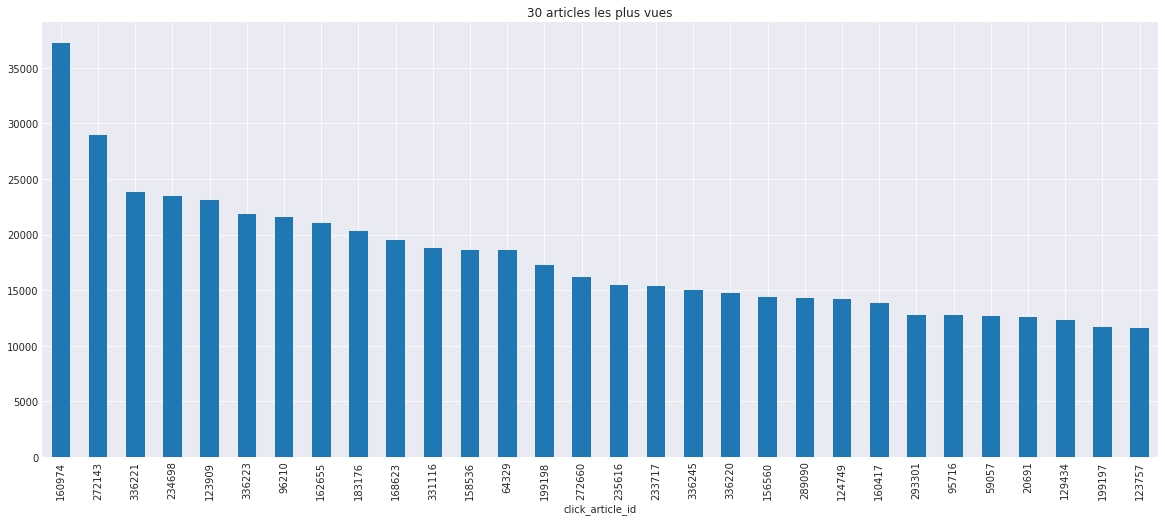

In [39]:
plt.figure(figsize=(20,8))
all_df.groupby("click_article_id")["user_id"].count().sort_values(ascending=False).head(30).plot(kind="bar",
                                                                                                 title="30 articles les plus vues")
plt.show()

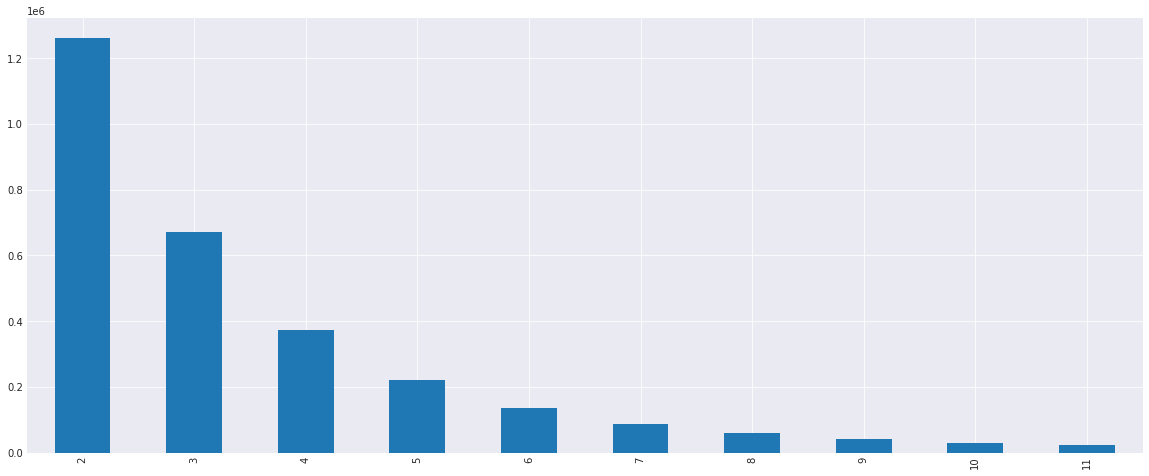

In [38]:
plt.figure(figsize=(20,8))
all_df["session_size"].value_counts().head(10).plot(kind="bar")
plt.show()